# Week 2 Assignment: Image Processing with OpenCV and NumPy


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Problem 1: Sharpening & Sobel Filters
img = cv2.imread('Color_Image.jpg')
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, sharpen_kernel)
combined = np.hstack((img, sharpened))
cv2.imshow("Original vs Sharpened", combined)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
cv2.imshow("Sobel X", cv2.convertScaleAbs(sobelx))
cv2.imshow("Sobel Y", cv2.convertScaleAbs(sobely))
cv2.waitKey(5)
cv2.destroyAllWindows()

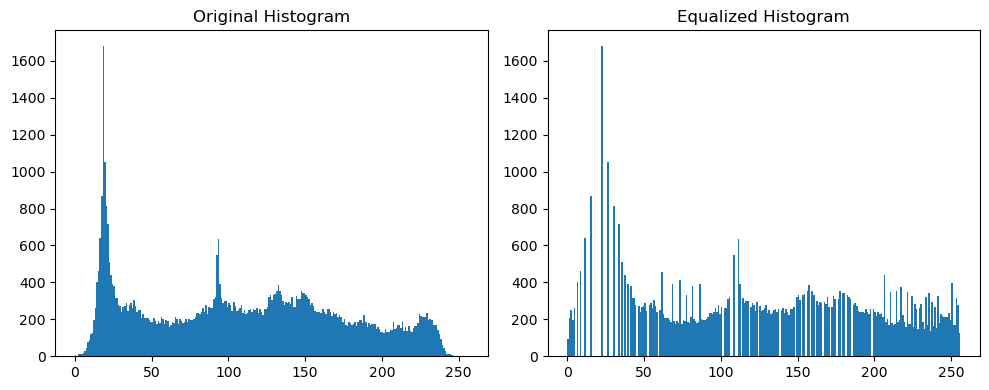

In [6]:

# ---------- Problem 2: Histogram Equalization ----------
gray = cv2.imread('GREYSCALE.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 4))
plt.subplot(121), plt.hist(gray.ravel(), 256, [0, 256]), plt.title('Original Histogram')
eq = cv2.equalizeHist(gray)
plt.subplot(122), plt.hist(eq.ravel(), 256, [0, 256]), plt.title('Equalized Histogram')
plt.tight_layout(), plt.show()
cv2.imshow("Original", gray)
cv2.imshow("Equalized", eq)
cv2.waitKey(0)
cv2.destroyAllWindows()


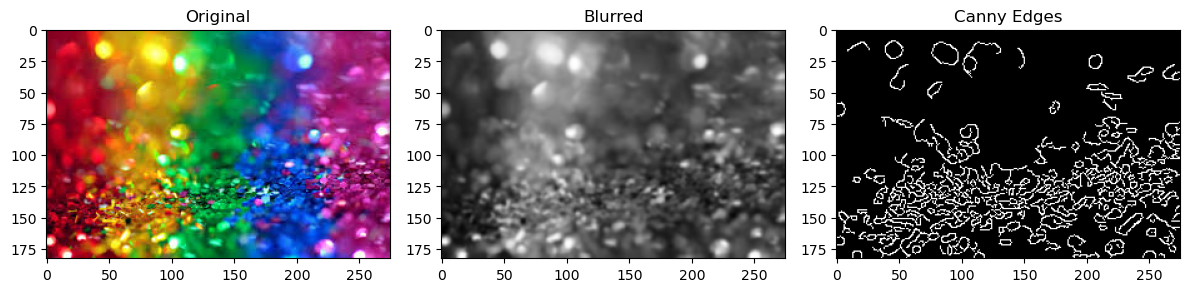

(None, None)

In [7]:
# ---------- Problem 3: Image Processing Pipeline ----------
img = cv2.imread('Color_Image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(132), plt.imshow(blur, cmap='gray'), plt.title('Blurred')
plt.subplot(133), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
plt.tight_layout(), plt.show()

In [9]:
# ---------- Problem 4: Bright Pixels & Drawing ----------
# Brightness threshold
gray = cv2.imread('GREYSCALE.jpg', cv2.IMREAD_GRAYSCALE)
bright_pixels = np.where(gray > 200)
img_color = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
for y, x in zip(*bright_pixels):
    img_color[y, x] = [255, 255, 255]
cv2.imshow("Bright Pixels Highlighted", img_color)

# Bounding boxes and labels
img = cv2.imread('Color_image.jpg')
boxes = [(50, 60, 150, 120), (200, 180, 300, 250)]
for i, (x1, y1, x2, y2) in enumerate(boxes):
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"Object {i+1}", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
cv2.imshow("Bounding Boxes", img)

# Drawing shapes on blank image
canvas = np.zeros((500, 500, 3), dtype=np.uint8)
cv2.rectangle(canvas, (50, 50), (150, 150), (0, 0, 255), 2)
cv2.circle(canvas, (300, 100), 40, (0, 255, 0), -1)
cv2.line(canvas, (0, 0), (500, 500), (255, 0, 0), 2)
cv2.putText(canvas, "Krishna", (350, 490), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
cv2.imwrite('shapes_output.jpg', canvas)
cv2.imshow("Shapes", canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# ---------- Problem 5: HSV Channel Operations ----------
img = cv2.imread('Color_Image.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
cv2.imshow("Hue", h)
cv2.imshow("Saturation", s)
cv2.imshow("Value", v)

reconverted = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2.imshow("Original BGR", img)
cv2.imshow("HSV Image", cv2.merge([h, s, v]))
cv2.imshow("Reconverted BGR", reconverted)
cv2.waitKey(0)
cv2.destroyAllWindows()